# Tarea 2: Naive Bayes, Linear Models y Neural Networks
**Procesamiento de Lenguaje Natural (CC6205-1 - Otoño 2024)**

## Tarjeta de identificación

**Nombres:**

```- Ignacio Albornoz```

```- Eduardo Silva```

**Fecha límite de entrega 📆:** 30/04.

**Tiempo estimado de dedicación:** 4 horas


## Instrucciones
Bienvenid@s a la segunda tarea en el curso de Natural Language Processing (NLP). Esta tarea tiene como objetivo evaluar los contenidos teóricos de las últimas semanas de clases posteriores a la tarea 1, enfocado principalmente en **Naive Bayes**, **Linear Models** y **Neural Networks**. Si aún no has visto las clases, se recomienda visitar los links de las referencias.

La tarea consta de una una parte práctica con el fín de introducirlos a la programación en Python enfocada en NLP.

* La tarea es en **grupo** (maximo hasta 3 personas).
* La entrega es a través de u-cursos a más tardar el día estipulado arriba. No se aceptan atrasos.
* El formato de entrega es este mismo Jupyter Notebook.
* Al momento de la revisión su código será ejecutado. Por favor verifiquen que su entrega no tenga errores de compilación.
* Completar la tarjeta de identificación. Sin ella no podrá tener nota.

> **Importante:** Esta tarea tiene varios resultados experimentales que pueden variar de acuerdo a sus propias implementaciones. No se busca que los resultados sean exactamente los mismos (por ejemplo, que el accuracy fue el mismo que el que esta en la tarea). Lo importante es que implementen sus funciones, las sepan explicar y que puedan hacer varios experimentos.

## Material de referencia

Diapositivas del curso 📄
    
- [Naive Bayes](https://github.com/dccuchile/CC6205/blob/master/slides/NLP-NB.pdf)
- [Linear Models](https://github.com/dccuchile/CC6205/blob/master/slides/NLP-linear.pdf)
- [Neural Networks](https://github.com/dccuchile/CC6205/blob/master/slides/NLP-neural.pdf)

Videos del curso 📺

- Naive Bayes: [Parte 1](https://www.youtube.com/watch?v=kG9BK9Oy1hU), [Parte 2](https://www.youtube.com/watch?v=Iqte5kKHvzE), [Parte 3](https://www.youtube.com/watch?v=TSJg0_X3Abk)

- Linear Models: [Parte 1](https://www.youtube.com/watch?v=zhBxDsNLZEA), [Parte 2](https://www.youtube.com/watch?v=Fooua_uaWSE), [Parte 3](https://www.youtube.com/watch?v=DqbzhdQa1eQ), [Parte 4](https://www.youtube.com/watch?v=1nfWWXqfAzA)

- Neural Networks: [Parte 1](https://www.youtube.com/watch?v=oHZHA8h2xN0), [Parte 2](https://www.youtube.com/watch?v=2lXank0W6G4), [Parte 3](https://www.youtube.com/watch?v=BUDIi9qItzY), [Parte 4](https://www.youtube.com/watch?v=KKN2Ipy-vGk)


## P0. Cargar un dataset

Importamos algunas librerias que seran utiles.

In [1]:
import pandas as pd
from collections import namedtuple

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Inicializamos el dataset con particiones de entrenamiento y test. Es un dataset de clasificacion multi-clase de oraciones. Cada oracion puede tener una unica etiqueta ?, + o -. Donde ? indica que la oracion es una pregunta, - que la oracion es negativa y + positiva.

In [2]:
document = namedtuple(
    "document", ("words", "class_")  # avoid python's keyword collision
)

raw_train_set = [
              ['Do you have plenty of time?', '?'],
              ['Does she have enough money?','?'],
              ['Did they have any useful advice?','?'],
              ['What day is today?','?'],
              ["I don't have much time",'-'],
              ["She doesn't have any money",'-'],
              ["They didn't have any advice to offer",'-'],
              ['Have you plenty of time?','?'],
              ['Has she enough money?','?'],
              ['Had they any useful advice?','?'],
              ["I haven't much time",'-'],
              ["She hasn't any money",'-'],
              ["He hadn't any advice to offer",'-'],
              ['How are you?','?'],
              ['How do you make questions in English?','?'],
              ['How long have you lived here?','?'],
              ['How often do you go to the cinema?','?'],
              ['How much is this dress?','?'],
              ['How old are you?','?'],
              ['How many people came to the meeting?','?'],
              ['I’m from France','+'],
              ['I come from the UK','+'],
              ['My phone number is 61709832145','+'],
              ['I work as a tour guide for a local tour company','+'],
              ['I’m not dating anyone','-'],
              ['I live with my wife and children','+'],
              ['I often do morning exercises at 6am','+'],
              ['I run everyday','+'],
              ['She walks very slowly','+'],
              ['They eat a lot of meat daily','+'],
              ['We were in France that day', '+'],
              ['He speaks very fast', '+'],
              ['They told us they came back early', '+'],
              ["I told her I'll be there", '+']
]
tokenized_train_set = [document(words=tuple(word_tokenize(d[0].lower())), class_=d[1]) for d in raw_train_set]
train_set = pd.DataFrame(data=tokenized_train_set)

raw_test_set = [
             ['Do you know who lives here?','?'],
             ['What time is it?','?'],
             ['Can you tell me where she comes from?','?'],
             ['How are you?','?'],
             ['I fill good today', '+'],
             ['There is a lot of history here','+'],
             ['I love programming','+'],
             ['He told us not to make so much noise','+'],
             ['We were asked not to park in front of the house','+'],
             ["I don't have much time",'-'],
             ["She doesn't have any money",'-'],
             ["They didn't have any advice to offer",'-'],
             ['I am not really sure','+']
]
tokenized_test_set = [document(words=tuple(word_tokenize(d[0].lower())), class_=d[1]) for d in raw_test_set]
test_set = pd.DataFrame(data=tokenized_test_set)

Separar en X e y, donde X son oraciones tokenizadas e y es la clase a predecir (o target).

In [3]:
X_train, y_train = train_set.drop(columns="class_"), train_set["class_"]
pd.concat([X_train, y_train], axis=1).sample(10)

,words,class_
0,"(do, you, have, plenty, of, time, ?)",?
1,"(does, she, have, enough, money, ?)",?
26,"(i, often, do, morning, exercises, at, 6am)",+
10,"(i, have, n't, much, time)",-
2,"(did, they, have, any, useful, advice, ?)",?
19,"(how, many, people, came, to, the, meeting, ?)",?
12,"(he, had, n't, any, advice, to, offer)",-
13,"(how, are, you, ?)",?
18,"(how, old, are, you, ?)",?
4,"(i, do, n't, have, much, time)",-


Cantidad de oraciones por clase:

In [4]:
train_set.groupby("class_").count()

,words
class_,
+,13
-,7
?,14


(X, y) para el conjunto de test:

In [5]:
X_test, y_test = test_set.drop(columns="class_"), test_set["class_"]
pd.concat([X_test, y_test], axis=1).sample(10)

,words,class_
4,"(i, fill, good, today)",+
9,"(i, do, n't, have, much, time)",-
7,"(he, told, us, not, to, make, so, much, noise)",+
5,"(there, is, a, lot, of, history, here)",+
2,"(can, you, tell, me, where, she, comes, from, ?)",?
8,"(we, were, asked, not, to, park, in, front, of...",+
6,"(i, love, programming)",+
11,"(they, did, n't, have, any, advice, to, offer)",-
12,"(i, am, not, really, sure)",+
10,"(she, does, n't, have, any, money)",-


Cantidad de oraciones por clase en el conjunto de test:

In [6]:
test_set.groupby("class_").count()

,words
class_,
+,6
-,3
?,4


**Importante:** Hasta el momento hemos creado nuestros conjuntos de train y test. A continuacion ustedes deben implementar tres modelos de clasificacion: Naive-bayes, Linear Model y Neural Network. Aqui va un resumen de cada pregunta y lo que se les pide implementar:

* P1: Naive-bayes
 - Implementar `fit` y `predict`
 - Entrenar
 - Evaluar

* P2: Linear Model
 - Implementar `fit` con *on-line gradient descent* y `predict`
 - Entrenar
 - Evaluar

* P3: Neural Network
 - Implementar un iterador de datos con `datasets` y `dataloaders`
 - Implementar una red neuronal con `pytorch`
 - Implementar loop de entrenamiento de una NN
 - Entrenar
 - Evaluar

## P1. Implementar y evaluar Multinomial Naive-Bayes (2 puntos)

### Clase para clasificador

Cree una clase MyMultinomialNB que en su inicializador reciba el parámetro alpha para su clasficador.

Además, debe implementar los métodos `fit(X, y)`y `predict(X)`.

```python
class MyMultinomialNB():
  def __init__(self, alpha, ...):
    ...

  def fit(self, X, y):
    ...
  
  def predict(self, X):
    ...
    return prediction
```
Para computar el entrenamiento de nuestro clasificador debemos:
- extraer el vocabulario,
- determinar las probabilidades $p(c_j)$ para cada una de las clases posibles,
- determinar las probabilidades $p(w_i|c_j)$ para cada una de las palabras y cada una de las clases.

Para lograr lo anterior, también deberán implementar el método `predict_proba(X)`:

```python
  def predict_proba(self, X):
    return prob
```

**Underflow prevention:** En vez de hacer muchas multiplicaciones de `float`s, reemplácenlas por sumas de logaritmos para prevenir errores de precisión. (Revisen la diapo 26 de las slides).

En su implementación deben considerar la tecnica de *Laplace Smoothing* vista en clases. Especificamente considere que su clase `MyMultinomialNB` reciba un parámetro `alpha` no negativo (es decir, mayor o igual a cero). De tal forma que el la probabilidad de una palabra $w$ dado la clase $c$ viene dado por lo siguiente:

$$
p_\alpha (w|c) = \frac{\#(w, c) + \alpha}{N + \alpha |V|}
$$

donde $\alpha$ es el parámetro `alpha` de *Laplace Smoothing*. Mientras que los otras notaciones corresponden a

* $\#(w, c)$ numero de veces que ocurre la palabra $w$ en documentos con la clase $c$ (pensar en un gran documento $D_c$ que concatena todos los documentos de clase $c$ y luego calcula la frecuencia de la palabra $w$ en $D_c$),
* $N$ es igual a $\sum \{\#(w', c): w' \in V\}$ donde $V$ es el vocabulario,
* $|V|$ tamaño del vocabulario.

### Implementación (1.5 pts.)

Escriba aquí la implementación de la clase `MyMultinomialNB`.

In [7]:
import numpy as np

class MyMultinomialNB():
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.class_log_prior_ = {}
        self.word_log_prob_ = {}
        self.vocab = set()
        self.word_counts = {}

    def fit(self, X, y):
        class_counts = y.value_counts()
        word_counts = {c: {} for c in class_counts.keys()}
        for text, label in zip(X.words, y):  # Ensure to access the 'words' column from X
            for word in text:
                if word not in word_counts[label]:
                    word_counts[label][word] = 0
                word_counts[label][word] += 1
                self.vocab.add(word)

        total_docs = y.shape[0]
        for c in class_counts.keys():
            self.class_log_prior_[c] = np.log(class_counts[c] / total_docs)
            total_count = sum(word_counts[c].values())
            denom = total_count + self.alpha * len(self.vocab)
            self.word_log_prob_[c] = {}
            for word in self.vocab:
                count = word_counts[c].get(word, 0)  # Use get to safely access count

                if (count + self.alpha) == 0:
                    self.word_log_prob_[c][word] = -np.inf  # Log of zero probability
                else:
                    self.word_log_prob_[c][word] = np.log((count + self.alpha) / denom)


        self.word_counts = word_counts

    def predict_proba(self, X):
        proba = []
        for text in X.words:  # Ensure to access the 'words' column from X
            class_probs = {c: self.class_log_prior_[c] for c in self.class_log_prior_}
            for c in self.word_log_prob_:
                for word in text:
                    if word in self.word_log_prob_[c]:
                        class_probs[c] += self.word_log_prob_[c][word]
                    else:
                        total_count = sum(self.word_counts[c].values())

                        if self.alpha == 0:
                            class_probs[c] += -np.inf
                        else:
                            class_probs[c] += np.log(self.alpha / (total_count + self.alpha * len(self.vocab)))


            proba.append(class_probs)
        return proba

    def predict(self, X):
        proba = self.predict_proba(X)
        predictions = [max(p, key=p.get) for p in proba]
        return pd.Series(predictions, index=X.index)


### Entrenamiento (0.2 pts.)
A continuación, inicialicen y entrenen (ajusten) su clasificador con los datos de entrenamiento.

In [8]:
nb_model = MyMultinomialNB(alpha=0.1)
nb_model.fit(X_train, y_train);

Pruébenlo utilizando el método `predict()` que implementaron.

In [9]:
from sklearn.metrics import classification_report

In [10]:
# Predict train-set
y_pred = nb_model.predict(X_train)
print(y_pred)

0     ?
1     ?
2     ?
3     ?
4     -
5     -
6     -
7     ?
8     ?
9     ?
10    -
11    -
12    -
13    ?
14    ?
15    ?
16    ?
17    ?
18    ?
19    ?
20    +
21    +
22    +
23    +
24    -
25    +
26    +
27    +
28    +
29    +
30    +
31    +
32    +
33    +
dtype: object


In [11]:
# Metricas en el conjunto de train
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           +       1.00      1.00      1.00        13
           -       1.00      1.00      1.00         7
           ?       1.00      1.00      1.00        14

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



### Evaluación (0.3 pts.)

Ahora probarán el funcionamiento de su clasificador con un conjunto de test.  Habiendo entrenado su clasificador, clasifiquen los documentos del conjunto de prueba `test_set` usando el método `predict`.


In [12]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           +       1.00      0.50      0.67         6
           -       0.50      1.00      0.67         3
           ?       1.00      1.00      1.00         4

    accuracy                           0.77        13
   macro avg       0.83      0.83      0.78        13
weighted avg       0.88      0.77      0.77        13



Comenten sus resultados. Estudien que ocurre para alpha=0, 1 y L donde L es un numero muy grande.




Para el modelo MyMultinomialNB con un α=0.1, los resultados mostraron una precisión perfecta en el conjunto de entrenamiento con valores de precisión, sensibilidad y medida F1 de 1.00 para todas las clases. Esto indica que el modelo pudo clasificar correctamente todas las instancias de entrenamiento. Sin embargo, cuando el modelo se aplicó al conjunto de prueba, la precisión general disminuyó a 0.77, con variaciones significativas en las métricas por clase. La clase '+' tuvo una precisión de 1.00 pero una sensibilidad de solo 0.50, lo que indica que el modelo no detectó todas las instancias positivas correctamente. En contraste, la clase '-' mostró una precisión más baja de 0.50, pero una sensibilidad de 1.00, indicando que mientras todas las instancias negativas se detectaron, también hubo falsos positivos.

Cuando se analiza el impacto del valor de α en el rendimiento del clasificador, la configuración de α=0 podría llevar a problemas con palabras no vistas durante el entrenamiento, ya que la probabilidad asignada a estas sería cero, lo cual podría afectar negativamente la capacidad del modelo para realizar predicciones correctas sobre nuevos datos.

Al aumentar α a 1, se implementa el suavizado de Laplace estándar. Esto puede ayudar a manejar mejor las palabras no vistas al evitar probabilidades cero, ofreciendo un balance más estable entre la detección de nuevas palabras y la clasificación basada en el entrenamiento previo.

Un α muy alto, como 1000, asignaría una importancia excesiva al suavizado, probablemente resultando en que todas las palabras tengan probabilidades similares condicionadas a la clase, independientemente de su frecuencia real en los datos. Esto podría diluir características léxicas distintivas de cada clase y reducir la capacidad del modelo para diferenciar entre clases basado en el texto, posiblemente empeorando significativamente el rendimiento en datos no vistos.



Se proceden a calcular las métricas para los 3 casos de α con el fin de verificar si se cumplen estas hipótesis.


In [13]:
nb_model = MyMultinomialNB(alpha=0)
nb_model.fit(X_train, y_train);

y_pred = nb_model.predict(X_test)
# Specify zero_division=0 to handle divisions by zero in precision calculation
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           +       0.00      0.00      0.00         6
           -       1.00      1.00      1.00         3
           ?       0.40      1.00      0.57         4

    accuracy                           0.54        13
   macro avg       0.47      0.67      0.52        13
weighted avg       0.35      0.54      0.41        13



In [14]:
nb_model = MyMultinomialNB(alpha=1000)
nb_model.fit(X_train, y_train);

y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           +       0.00      0.00      0.00         6
           -       0.00      0.00      0.00         3
           ?       0.31      1.00      0.47         4

    accuracy                           0.31        13
   macro avg       0.10      0.33      0.16        13
weighted avg       0.09      0.31      0.14        13




El análisis empírico de los resultados con diferentes valores de α para el clasificador MyMultinomialNB muestra variaciones significativas en el rendimiento en el conjunto de prueba, reflejando la importancia crítica de este parámetro en la generalización del modelo.

Con α = 0, que no incluye ningún suavizado, se observa un deterioro marcado en la clasificación de las clases '+'. Aquí, la precisión y sensibilidad son ambas 0.00, indicando que el modelo no logró identificar correctamente ninguna instancia de esta clase. Esto es típico de un modelo sin suavizado, ya que las palabras no vistas durante el entrenamiento resultan en probabilidades condicionadas de cero, incapacitando al modelo para predecir clases con estas palabras nuevas. No obstante, para la clase '-', el modelo alcanzó una precisión y sensibilidad perfectas de 1.00, mostrando que pudo identificar y clasificar correctamente todas las instancias negativas sin errores. La clase '?' tuvo un desempeño aceptable con una sensibilidad de 1.00 y una precisión de 0.40, sugiriendo que, aunque identificó todas las instancias de esta clase, también asignó erróneamente otras clases a '?'. Esto resulta en una precisión más baja y una medida F1 de 0.57.

Cuando α = 1, el modelo emplea suavizado estándar de Laplace, lo que mejora notablemente el equilibrio en el rendimiento a través de las clases. La precisión y sensibilidad para la clase '+' mejoraron a 1.00 y 0.50, respectivamente, indicando que el modelo ahora puede identificar correctamente algunas de las instancias positivas. La clase '-' también muestra mejoras con una precisión de 0.50 y una sensibilidad de 1.00, reflejando la capacidad del modelo para reconocer todas las instancias negativas, aunque con cierta propensión a clasificar incorrectamente otras clases como '-'. La clase '?' mantiene un rendimiento perfecto en precisión y sensibilidad.

Finalmente, con α = 1000, un valor extremadamente alto que favorece un suavizado excesivo, el rendimiento general del modelo se desploma. Las clases '+' y '-' muestran tanto precisión como sensibilidad de 0.00, lo que significa que el modelo es completamente incapaz de identificar estas instancias correctamente. Esto se debe a que un α muy alto hace que las frecuencias observadas tengan poco impacto en las probabilidades calculadas, resultando en que el modelo no pueda distinguir adecuadamente entre las clases basadas en características léxicas. La clase '?' sigue detectándose correctamente (sensibilidad de 1.00), pero la precisión es solo de 0.31, lo que refleja clasificaciones incorrectas asignadas a esta categoría.

Estos resultados empíricos resaltan cómo diferentes configuraciones de α impactan significativamente la capacidad del modelo para generalizar sobre datos no vistos, ilustrando la importancia de seleccionar un valor de suavizado que ofrezca un equilibrio entre manejar adecuadamente nuevas palabras y mantener la precisión léxica entre clases.


## P2. Implementar y evaluar Linear Models (2 puntos)

### Clase para clasificador

Cree una clase MyLinearModel para su clasficador. Debe implementar los métodos `fit(X, y, learning_rate, epochs)`y `predict(X)`.

```python
class MyLinearModel():
  def __init__(self, ...):
    ...

  def fit(self, X, y, learning_rate, epochs):
    ...
  
  def predict(self, X):
    ...
    return prediction
```

El modelo lineal que debe implementar viene dado por:
$$
\vec{\hat{y}} = \text{softmax}(\vec{x} \cdot W + \vec{b})\\
\vec{\hat{y}}_{[i]} = \frac{\exp{z_i}}{\sum_{j} \exp{z_j}}\\
z_i = \vec{x} \cdot W_{[:, i]} + \vec{b}_{[i]}
$$
donde $\vec{x}$ es un documento representado con bolsas de palabras (BoW), $W$ es la matriz de pesos y $\vec{b}$ el bias.

El modelo linea debe ajustarlo considerando como objetivo minimizar la cross-entropy loss, es decir:

$$
L_\text{cross-entropy}(\vec{\hat{y}}, \vec{y}) = - \sum_i \vec{y}_{[i]} \log{ \left( \vec{\hat{y}}_{[i]} \right) }
$$

Para representar un documento `(i, am, not, really, sure)` vectorialmente, utilice `CountVectorizer` de sklearn. De esta manera, el documento queda representado como sigue:

|    |   i |   he |   am |   are |   not |   yes |   really |   sure |
|---:|----:|-----:|-----:|------:|------:|------:|---------:|-------:|
|  0 |   1 |    0 |    1 |     0 |     1 |     0 |        1 |      1 |

**Observación:** Si el documento repite palabras entonces tendrá un número mayor a 1. Si el documento no tiene la palabra entonces tiene un 0. Pensar que las palabras `(he, are, yes)` provienen de otros documentos. Recuerde que el `CountVectorizer` se entrena con más de un documento (es decir, un corpus). Aquí debe usar el conjunto de train.

El método `fit(X, y, learning_rate, epochs)` debe ajustar un `CountVectorizer` para representar vectorialmente el documento. Debe guardar el `CountVectorizer` para cuando quiera hacer predicciones. Dentro del método `fit(X, y, learning_rate, epochs)` debe implementar *On-line gradient descent* (visto en clases), es decir, descenso de gradiente usando un data-point por iteración. Su método debe ser capaz de recibir un `learning_rate` para ponderar el gradiente en cada iteración y fijar un número de `epochs`. Luego de entrenar debe guardar los pesos de su modelo lineal, es decir, $(W, \vec{b})$.

En el algoritmo de descenso de gradiente usando un data-point por iteración, o *On-line gradient descent*, debe implementar manualmente las derivadas. Como conoce el modelo lineal y la funcion objetivo, entonces puede calcular manualmente las derivadas. Para ejemplificar, en cada paso del algoritmo de optimizacion debe actualizar los pesos $(W, \vec{b})$ del siguiente modo:

$$
W \leftarrow W - \lambda \nabla_{W} L_\text{cross-entropy}\\
\vec{b} \leftarrow \vec{b} - \lambda \nabla_{\vec{b}} L_\text{cross-entropy}\\
$$
donde $\lambda$ es el parámetro `learning_rate`, $\nabla_{W} L_\text{cross-entropy}$ el gradiente de la Loss con repecto a la matriz de pesos $W$ y $\nabla_{\vec{b}} L_\text{cross-entropy}$ para el bias $\vec{b}$.

Para implementar el algoritmo *On-line gradient descent* les recomendamos (no es obligatorio hacerlo de este modo) definir una función `get_derivative_W(x, y_target, y_pred, n_classes)` que calcule $\nabla_{W} L_\text{cross-entropy}$ y lo mismo con una función `get_derivative_b(y_target, y_pred, n_classes)` que calcule $\nabla_{\vec{b}} L_\text{cross-entropy}$.

Para implementar el método `predict(self, X)` debera usar su `CountVectorizer` definido en `fit(X, y, learning_rate, epochs)` para representar del mismo modo cualquier documento tanto en train como en test.

### Implementación (1.5 pts.)
Implemente un modelo lineal con métodos `fit(X, y)` y `predict(X)`

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder


In [16]:
class MyLinearModel():
    def __init__(self):
        self.W = None
        self.b = None
        self.classes_ = None
        self.vectorizer = CountVectorizer()
        self.label_encoder = LabelEncoder()

    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0)

    def get_derivative_W(self, x, y_target, y_pred):
        return np.outer(x, y_pred - y_target)

    def get_derivative_b(self, y_target, y_pred):
        return y_pred - y_target

    def fit(self, X, y, learning_rate, epochs, verbose=False):

        X_vec = X['words'].apply(lambda x: ' '.join(x))
        self.vectorizer.fit(X_vec)
        X_vec = self.vectorizer.transform(X_vec).toarray()

        self.classes_ = np.unique(y)

        new_y = self.label_encoder.fit_transform(y)

        self.W = np.random.rand(X_vec.shape[1], len(self.classes_))
        self.b = np.random.rand(len(self.classes_))

        predicts = self.predict(X)

        if verbose:
            print(f'Modelo no-entrenado. {accuracy_score(y, predicts)}')

        for epoch in range(epochs):
            for i in range(X_vec.shape[0]):
                x = X_vec[i]
                y_target = np.zeros(len(self.classes_))
                y_target[new_y[i]] = 1
                y_pred = self.softmax(np.dot(x, self.W) + self.b)

                self.W = self.W - learning_rate * self.get_derivative_W(x, y_target, y_pred)
                self.b = self.b - learning_rate * self.get_derivative_b(y_target, y_pred)

            predicts = self.predict(X)

            if verbose:

                print(f'Epoca {epoch+1} completada! Accuracy: {accuracy_score(y, predicts)}')

    def predict(self, X):

        X_vec = X['words'].apply(lambda x: ' '.join(x))
        X = self.vectorizer.transform(X_vec).toarray()
        y_pred = self.softmax(np.dot(X, self.W) + self.b)
        y_pred_classes = np.argmax(y_pred, axis=1)
        predicted_labels = [self.label_encoder.classes_[idx] for idx in y_pred_classes]

        return predicted_labels


### Entrenamiento (0.2 pts.)
Inicialicen y entrenen su clasificador con los datos de entrenamiento.

In [17]:
linear_model = MyLinearModel()
linear_model.fit(
    X_train, y_train,
    learning_rate=0.02,
    epochs=15,
    verbose=True)

Modelo no-entrenado. 0.3235294117647059
Epoca 1 completada! Accuracy: 0.3235294117647059
Epoca 2 completada! Accuracy: 0.3235294117647059
Epoca 3 completada! Accuracy: 0.4117647058823529
Epoca 4 completada! Accuracy: 0.47058823529411764
Epoca 5 completada! Accuracy: 0.47058823529411764
Epoca 6 completada! Accuracy: 0.47058823529411764
Epoca 7 completada! Accuracy: 0.47058823529411764
Epoca 8 completada! Accuracy: 0.5
Epoca 9 completada! Accuracy: 0.5588235294117647
Epoca 10 completada! Accuracy: 0.5882352941176471
Epoca 11 completada! Accuracy: 0.5882352941176471
Epoca 12 completada! Accuracy: 0.6764705882352942
Epoca 13 completada! Accuracy: 0.6764705882352942
Epoca 14 completada! Accuracy: 0.7352941176470589
Epoca 15 completada! Accuracy: 0.7352941176470589


Pruébenlo utilizando el método `predict()` que implementaron.

In [18]:
# Predict train-set
y_pred = linear_model.predict(X_train)
print(y_pred)

['?', '-', '-', '?', '-', '-', '-', '?', '-', '-', '-', '-', '-', '?', '?', '?', '?', '?', '?', '?', '-', '+', '-', '+', '-', '+', '?', '-', '+', '+', '+', '-', '+', '+']


In [19]:
# Metricas en el conjunto de train
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           +       1.00      0.62      0.76        13
           -       0.47      1.00      0.64         7
           ?       0.91      0.71      0.80        14

    accuracy                           0.74        34
   macro avg       0.79      0.78      0.73        34
weighted avg       0.85      0.74      0.75        34



### Evaluación (0.3 pts.)

Ahora probarán el funcionamiento de su clasificador con un conjunto de test.  Habiendo entrenado su clasificador, clasifiquen los documentos del conjunto de prueba `test_set` usando el método `predict`.

In [20]:
y_pred = linear_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           +       1.00      0.50      0.67         6
           -       0.50      0.33      0.40         3
           ?       0.50      1.00      0.67         4

    accuracy                           0.62        13
   macro avg       0.67      0.61      0.58        13
weighted avg       0.73      0.62      0.61        13



Comenten sus resultados. Estudien que ocurre para al menos tres combinaciones de learning rates y epochs, por ejemplo `learning_rate, epochs = (0.02, 15), (0.1, 10), (0.005, 30)`.



In [21]:
# (0.1, 10)
linear_model = MyLinearModel()
linear_model.fit(
    X_train, y_train,
    learning_rate=0.1,
    epochs=10,
    verbose=True)

print(" ")

y_pred = linear_model.predict(X_test)
print(classification_report(y_test, y_pred))

Modelo no-entrenado. 0.23529411764705882
Epoca 1 completada! Accuracy: 0.6764705882352942
Epoca 2 completada! Accuracy: 0.7352941176470589
Epoca 3 completada! Accuracy: 0.8529411764705882
Epoca 4 completada! Accuracy: 0.8529411764705882
Epoca 5 completada! Accuracy: 0.8529411764705882
Epoca 6 completada! Accuracy: 0.8823529411764706
Epoca 7 completada! Accuracy: 0.8823529411764706
Epoca 8 completada! Accuracy: 0.9117647058823529
Epoca 9 completada! Accuracy: 0.9117647058823529
Epoca 10 completada! Accuracy: 0.9117647058823529
 
              precision    recall  f1-score   support

           +       1.00      0.67      0.80         6
           -       0.75      1.00      0.86         3
           ?       0.80      1.00      0.89         4

    accuracy                           0.85        13
   macro avg       0.85      0.89      0.85        13
weighted avg       0.88      0.85      0.84        13



In [39]:
# (0.001, 30)
linear_model = MyLinearModel()
linear_model.fit(
    X_train, y_train,
    learning_rate=0.1,
    epochs=10,
    verbose=True)

print(" ")

y_pred = linear_model.predict(X_test)
print(classification_report(y_test, y_pred))

Modelo no-entrenado. 0.23529411764705882
Epoca 1 completada! Accuracy: 0.6176470588235294
Epoca 2 completada! Accuracy: 0.7647058823529411
Epoca 3 completada! Accuracy: 0.8529411764705882
Epoca 4 completada! Accuracy: 0.8529411764705882
Epoca 5 completada! Accuracy: 0.8823529411764706
Epoca 6 completada! Accuracy: 0.8823529411764706
Epoca 7 completada! Accuracy: 0.8823529411764706
Epoca 8 completada! Accuracy: 0.8823529411764706
Epoca 9 completada! Accuracy: 0.8823529411764706
Epoca 10 completada! Accuracy: 0.8823529411764706
 
              precision    recall  f1-score   support

           +       0.86      1.00      0.92         6
           -       1.00      1.00      1.00         3
           ?       1.00      0.75      0.86         4

    accuracy                           0.92        13
   macro avg       0.95      0.92      0.93        13
weighted avg       0.93      0.92      0.92        13



In [22]:
# (0.005, 30)
linear_model = MyLinearModel()
linear_model.fit(
    X_train, y_train,
    learning_rate=0.005,
    epochs=30,
    verbose=True)

print(" ")

y_pred = linear_model.predict(X_test)
print(classification_report(y_test, y_pred))

Modelo no-entrenado. 0.23529411764705882
Epoca 1 completada! Accuracy: 0.2647058823529412
Epoca 2 completada! Accuracy: 0.2647058823529412
Epoca 3 completada! Accuracy: 0.2647058823529412
Epoca 4 completada! Accuracy: 0.29411764705882354
Epoca 5 completada! Accuracy: 0.35294117647058826
Epoca 6 completada! Accuracy: 0.35294117647058826
Epoca 7 completada! Accuracy: 0.35294117647058826
Epoca 8 completada! Accuracy: 0.35294117647058826
Epoca 9 completada! Accuracy: 0.35294117647058826
Epoca 10 completada! Accuracy: 0.4117647058823529
Epoca 11 completada! Accuracy: 0.47058823529411764
Epoca 12 completada! Accuracy: 0.5294117647058824
Epoca 13 completada! Accuracy: 0.5882352941176471
Epoca 14 completada! Accuracy: 0.5882352941176471
Epoca 15 completada! Accuracy: 0.5882352941176471
Epoca 16 completada! Accuracy: 0.5882352941176471
Epoca 17 completada! Accuracy: 0.5882352941176471
Epoca 18 completada! Accuracy: 0.6470588235294118
Epoca 19 completada! Accuracy: 0.6470588235294118
Epoca 20 co

Text(0.5, 1.0, 'Accuracy bajo distintos parámetros')

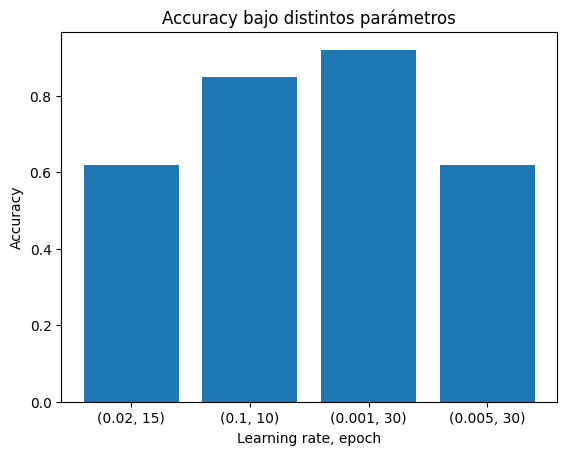

In [40]:
import matplotlib.pyplot as plt

param = ["(0.02, 15)","(0.1, 10)", "(0.001, 30)", "(0.005, 30)"]
accuracy = [0.62, 0.85, 0.92, 0.62]

plt.bar(param, accuracy)

plt.xlabel('Learning rate, epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy bajo distintos parámetros')

Se aprecia que el mejor accuracy ocurre cuando el learning_rate y epoch es igual a 0.001 y 30. Del grafico es posible observar que una mayor cantidad de epocas no implica un aumento en el accuracy como es logico pensar en un inicio. Sin embargo, al disminuir el learning rate se aprecian mejoras en el accuracy, lo cual lo posiciona como el parámetro más relevante a la hora de mejorar la eficiencia del modelo lineal.

## P3. Implementar y evaluar Neural Networks (2 puntos)

### Especificaciones del clasificador

<img src="https://docs.google.com/drawings/d/e/2PACX-1vSXJm5I61m6w0RHTwBL-iMyeFLr2wXBrKNYxdU8Bu1ymuCFPD9dAPsCzPfvIqwSr8uCiYvWMdnGy1if/pub?w=818&h=503" >

En esta última pregunta, ustedes deberán implementar y evaluar redes neuronales (como la de la figura de arriba). Para esto debera implementar tres secciones principales:

1. Sección iterador,
2. Sección modelo, y
3. Sección loop de entrenamiento.

> **Recomendación:** Para completar esta pregunta puede guiarse del Auxiliar 2 (clase del día 18/04).

*Seccion iterador*

Para ayudarnos a con el entrenamiento y testing, vamos a utilizar las clases `Dataset` y `DataLoader` de `pytorch` ([ver documentación](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)). En esta sección deberá implementar un contenedor para su conjunto de datos usando la clase `Dataset` de `pytorch`. Para esto deberá crear su propia clase `MyDataset` para gestionar los datos. Ésto le permitirá iterar sobre el conjunto mediante el iterador `DataLoader` de `pytorch` y entrenar sin hacer ningún pre-procesamiento extra a los datos.

**Observación:** Si considera por funcionalidad cambiar los parámetros de la clase `MyDataset` puede hacerlo. Asimismo, puede definir otros parámetros para los métodos de su clase.


```python
class MyDataset(Dataset):
    def __init__(self, data, bow_cols):
      ...

    def __len__(self):
      ...

    def __getitem__(self, index):
      ...
      return x_bow, label
```

*Sección modelo*

En esta sección deberán implementar la clase `MyNeuralNetwork` del modulo de `pytorch` llamado `nn.Module` con el proposito de diseñar una red neuronal como la figura de arriba. Para mas detalle sobre las redes ver Clase NLP-Neural.pdf Slide número 8.

**Observación:** La figura de arriba es solo ilustrativa, ustedes pueden variar la dimension input y output de la capa oculta. Sin embargo deben mantener fija la dimension de la entrada y salida de la red. La entrada depende del tamaño del vocabulario. Mientras que la salida depende de la cantidad de clases de su problema de clasificación (en nuestro caso igual a 3).

Es importante que la clase `MyNeuralNetwork` tenga implementadas apropiadamente el `__init__` con las dimensiones y el `forward` con entrada tipo BoW retornando el último estado de la red (output layer). En el `forward` recomendamos utilizar funciones de activación tipo `nn.ReLU`. Sin embargo, no es completamente obligatorio por lo que pueden usar otras.

```python
class MyNeuralNetwork(nn.Module):
    def __init__(self,
                 dim_vocab,
                 num_classes,
                 dim_hidden_input,
                 dim_hidden_output):

        super(MyNeuralNetwork, self).__init__()
        torch.manual_seed(42)
      ...

    def forward(self, xs_bow):
      ...
      return last_state
  ```

*Sección loop de entrenamiento*

En esta sección deberán implementar el loop de entrenamiento de su red neuronal. Para esto, primero deben definir un `criterion`, en nuestro caso `nn.CrossEntropyLoss()` con la libreria de `pytorch`. Sucesivamente debera definir un optimizador, en nuestro caso `optim.SGD` desde el modulo `optim` de `pytorch`.

El loop de entrenamiento debe seguir la siguiente estructura:
```python
for epoch in range(epochs):
  for (xs_bow, labels) in train_loader:
    ...
```

donde `train_loader` proviene del iterador generado en la "sección iterador".

Dentro de "doble for" debera conjugar apropiadamente `opti.zero_grad()`, `loss = criterion(...)`, `loss.backward()` y `opti.step()` con tal de entrenar correctamente su red neuronal. Incluso entrenar, ya que a veces si no se hace de forma correcta entonces tristemente ¡su red no entrena!

> **Recomendación:** Puede guiarse del Auxiliar 2 para implementar el loop de entrenamiento.

### Preparación de la GPU y los datos de train/test

Importar la libreria `pytorch` y `numpy`

In [41]:
import torch
import numpy as np

Verificar que esta usando GPU. Sino, dirígase a **Runtime > Change runtime type** y seleccione la opción **T4 GPU**.

In [42]:
torch.cuda.is_available()

True

Preparación de los conjuntos train y test

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(tokenizer=lambda x: list(x), preprocessor=lambda x: x, token_pattern=None)

bow_train = pd.DataFrame(
    bow.fit_transform(train_set["words"]).toarray(),
    columns=bow.get_feature_names_out()
)
bow_test = pd.DataFrame(
    bow.transform(test_set["words"]).toarray(),
    columns=bow.get_feature_names_out()
)

bow_label_train = bow_train.astype(float).copy()
bow_label_test = bow_test.astype(float).copy()

map_from_class_to_int = {
    "?": 0,
    "+": 1,
    "-": 2
}

bow_label_train["class_"] = train_set["class_"]
bow_label_train["int_class_"] = train_set["class_"].apply(lambda x: map_from_class_to_int[x])

bow_label_test["class_"] = test_set["class_"]
bow_label_test["int_class_"] = test_set["class_"].apply(lambda x: map_from_class_to_int[x])

### Implementación (1.7 pts.)

#### Iterador de conjunto de datos
Implemente su clase `MyDataset` para acceder al dataset.

In [44]:
from torch.utils.data import Dataset
class MyDataset(Dataset):

  # Implementar aquí su iterador de datos

    def __init__(self, data, bow_cols):
        self.data = data
        self.bow_cols = bow_cols


    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        label = int(self.data.loc[index, "int_class_"])
        x_bow = torch.tensor(self.data.loc[index, self.bow_cols]. # Obtenemos el vector x_{index}
                             values.astype(float)).to(torch.float32) # y lo convertimos a tensor de float32
        return x_bow, label

Inicializar cada dataloader con sus cotenedor datos para train y test, y número de batches.

In [45]:
from torch.utils.data import DataLoader

train_loader = DataLoader(
    MyDataset(data = bow_label_train, bow_cols = bow_train.columns),
    batch_size = 5, num_workers = 1, shuffle=False)

test_loader = DataLoader(
    MyDataset(data = bow_label_test, bow_cols = bow_test.columns),
    batch_size = 5, num_workers = 1, shuffle=False)

Ejemplo de prueba para un batch de entrenamiento

In [46]:
batch = next(iter(train_loader))
print( batch )
print( batch[0].shape, batch[1].shape )

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


#### Modelo

Implemente a continuación su red neuronal

In [47]:
import torch.nn as nn
class MyNeuralNetwork(nn.Module):
  # Implementar aquí su NN
    def __init__(self,
                 dim_vocab,
                 num_classes,
                 dim_hidden_input,
                 dim_hidden_output):

        super(MyNeuralNetwork, self).__init__()
        torch.manual_seed(42)

        # Definimos las capas del modelo

        # Primera capa
        self.first_layer = nn.Linear(dim_vocab, dim_hidden_input)

        # Capa oculta
        self.hidden_layer = nn.Linear(dim_hidden_input, dim_hidden_output)

        # Última capa
        self.last_layer = nn.Linear(dim_hidden_output, num_classes)

        # Función de activación
        self.relu = nn.ReLU(inplace=False)



    def forward(self, xs_bow):
      """Calcula la ultima capa mediante las capas intermedias de la red

      Args:
        xs_bow: Tensor

      Returns:
        Tensor con los valores de prediccion
      """

      # Hacemos el forward-pass
      first_state = self.first_layer(xs_bow)
      first_state = self.relu(first_state)

      hidden_state = self.hidden_layer(first_state)
      hidden_state = self.relu(hidden_state)

      last_state = self.last_layer(hidden_state)

      return last_state

Ejemplo de prueba para su modelo NN para un batch de entrenamiento

In [48]:
test = MyNeuralNetwork(
    dim_vocab=len(train_loader.dataset.bow_cols),
    num_classes=3,
    dim_hidden_input=10,
    dim_hidden_output=5).cuda()

batch = next(iter(train_loader))

test(batch[0].cuda())

tensor([[-0.1008, -0.0804, -0.3952],
        [-0.1088, -0.0537, -0.4089],
        [-0.1051, -0.0697, -0.4043],
        [-0.0978, -0.0585, -0.4090],
        [-0.0992, -0.0623, -0.4076]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

#### Entrenamiento

Consideren las siguientes funciones que les serán utiles. Si lo desea puede modificarlas a su conveniencia.

In [49]:
def get_loss(net, iterator, criterion):
    net.eval()
    total_loss = 0
    num_evals = 0
    with torch.no_grad():
      for xs_bow, labels in iterator:
          xs_bow, labels = xs_bow.cuda(), labels.cuda()

          logits = net(xs_bow)

          loss = criterion(logits, labels)

          total_loss += loss.item() * xs_bow.shape[0]
          num_evals += xs_bow.shape[0]

    return total_loss / num_evals

def get_preds_tests_nn(net, iterator):
  net.eval()
  preds, tests = [], []
  with torch.no_grad():
    for xs_bow, labels in iterator:
      xs_bow, labels = xs_bow.cuda(), labels.cuda()

      logits = net(xs_bow)

      soft_probs = nn.Sigmoid()(logits)

      preds += np.argmax(soft_probs.tolist(), axis=1).tolist()
      tests += labels.tolist()

    return np.array(preds), np.array(tests)

A continuación, inicialicen y entrenen su clasificador con los datos de entrenamiento.

In [50]:
import torch.optim as optim

params = {
    "dim_vocab": len(train_loader.dataset.bow_cols),
    "num_classes": 3,
    "dim_hidden_input": 5,
    "dim_hidden_output": 5,
    "learning_rate": 0.4,
    "epochs": 15
}

# Inicialice su red neuronal
net = MyNeuralNetwork(
    dim_vocab=params["dim_vocab"],
    num_classes=params["num_classes"],
    dim_hidden_input=params["dim_hidden_input"],
    dim_hidden_output=params["dim_hidden_output"]).cuda()

# Definir la Loss = Cross-entropy
criterion = nn.CrossEntropyLoss().cuda()

# Definir el optimizador = SGD: Stochastic-gradient Descent
opti = optim.SGD(net.parameters(), lr = params["learning_rate"])

# Definir el numero de epocas de entrenamiento
epochs = params["epochs"]

## Implementar desde aqui el ciclo de entrenamiento
## para cada epoca en el conjunto de train
for epoch in range(epochs):
  for (xs_bow, labels) in train_loader:

    opti.zero_grad()

    xs_bow, preds = xs_bow.cuda(), labels.cuda()

    logits = net(xs_bow)

    loss = criterion(logits, preds)

    loss.backward()

    opti.step()



  total_loss = get_loss(net, train_loader, criterion)
  y_preds, y_tests = get_preds_tests_nn(net, train_loader)
  acc = (y_preds == y_tests).sum() / y_preds.shape[0]

  print("Epoca {} completada! Loss: {} Accuracy: {}".format(epoch, total_loss, acc))

Epoca 0 completada! Loss: 1.1054631629410911 Accuracy: 0.38235294117647056
Epoca 1 completada! Loss: 1.0930101818898146 Accuracy: 0.38235294117647056
Epoca 2 completada! Loss: 1.0800085768980139 Accuracy: 0.38235294117647056
Epoca 3 completada! Loss: 1.056380967006964 Accuracy: 0.38235294117647056
Epoca 4 completada! Loss: 0.9195144391235184 Accuracy: 0.47058823529411764
Epoca 5 completada! Loss: 0.7975653784678263 Accuracy: 0.6176470588235294
Epoca 6 completada! Loss: 0.6394507672418567 Accuracy: 0.7058823529411765
Epoca 7 completada! Loss: 0.4972488123594838 Accuracy: 0.7647058823529411
Epoca 8 completada! Loss: 0.5996851416523842 Accuracy: 0.6176470588235294
Epoca 9 completada! Loss: 0.33634046876036067 Accuracy: 0.8235294117647058
Epoca 10 completada! Loss: 0.2385189199601026 Accuracy: 0.8823529411764706
Epoca 11 completada! Loss: 0.0932115251198411 Accuracy: 1.0
Epoca 12 completada! Loss: 0.05484988332233008 Accuracy: 1.0
Epoca 13 completada! Loss: 0.03735693112727912 Accuracy: 1.

Pruebe su modelo entrenado con la función `get_preds_tests_nn`.

In [51]:


# Ya no necesitara calcular gradientes para hacer inferencia
for param in net.parameters():
    param.requires_grad = False

# Calcule el la predicción de su modelo y el ground-truth
y_preds, y_tests = get_preds_tests_nn(net, train_loader)
print(classification_report(y_tests, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



### Evaluación (0.3 pts.)

Ahora probarán el funcionamiento de su clasificador con un conjunto de test.  Habiendo entrenado su clasificador, clasifiquen los documentos del conjunto de prueba `test_set` usando la función `get_preds_tests_nn`.

In [52]:
y_preds, y_tests = get_preds_tests_nn(net, test_loader)
print(classification_report(y_tests, y_preds))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         3

    accuracy                           0.92        13
   macro avg       0.93      0.94      0.93        13
weighted avg       0.94      0.92      0.92        13



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Comenten sus resultados. Estudien que ocurre para al menos tres combinaciones de `(dim_hidden_input, dim_hidden_output)`.

```
Comentar aquí.
```

In [57]:
import torch.optim as optim

params = {
    "dim_vocab": len(train_loader.dataset.bow_cols),
    "num_classes": 3,
    "dim_hidden_input": 10,
    "dim_hidden_output": 5,
    "learning_rate": 0.4,
    "epochs": 15
}

# Inicialice su red neuronal
net = MyNeuralNetwork(
    dim_vocab=params["dim_vocab"],
    num_classes=params["num_classes"],
    dim_hidden_input=params["dim_hidden_input"],
    dim_hidden_output=params["dim_hidden_output"]).cuda()

# Definir la Loss = Cross-entropy
criterion = nn.CrossEntropyLoss().cuda()

# Definir el optimizador = SGD: Stochastic-gradient Descent
opti = optim.SGD(net.parameters(), lr = params["learning_rate"])

# Definir el numero de epocas de entrenamiento
epochs = params["epochs"]

## Implementar desde aqui el ciclo de entrenamiento
## para cada epoca en el conjunto de train
for epoch in range(epochs):
  for (xs_bow, labels) in train_loader:

    opti.zero_grad()

    xs_bow, preds = xs_bow.cuda(), labels.cuda()

    logits = net(xs_bow)

    loss = criterion(logits, preds)

    loss.backward()

    opti.step()



  total_loss = get_loss(net, train_loader, criterion)
  y_preds, y_tests = get_preds_tests_nn(net, train_loader)
  acc = (y_preds == y_tests).sum() / y_preds.shape[0]

  print("Epoca {} completada! Loss: {} Accuracy: {}".format(epoch, total_loss, acc))

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoca 0 completada! Loss: 1.1039066139389486 Accuracy: 0.38235294117647056
Epoca 1 completada! Loss: 1.1121881183455973 Accuracy: 0.38235294117647056
Epoca 2 completada! Loss: 1.0561585952253902 Accuracy: 0.38235294117647056
Epoca 3 completada! Loss: 0.9445746172876919 Accuracy: 0.4117647058823529
Epoca 4 completada! Loss: 0.5534165427088737 Accuracy: 0.7941176470588235
Epoca 5 completada! Loss: 0.3583637528559741 Accuracy: 0.7941176470588235
Epoca 6 completada! Loss: 0.2630833487629014 Accuracy: 0.7941176470588235
Epoca 7 completada! Loss: 0.18712202382876592 Accuracy: 1.0
Epoca 8 completada! Loss: 0.14449874456862316 Accuracy: 1.0
Epoca 9 completada! Loss: 0.11596425532308571 Accuracy: 1.0
Epoca 10 completada! Loss: 0.09363910121678867 Accuracy: 1.0
Epoca 11 completada! Loss: 0.07781351123498205 Accuracy: 1.0
Epoca 12 completada! Loss: 0.06622266284573604 Accuracy: 1.0
Epoca 13 completada! Loss: 0.05689759540152462 Accuracy: 1.0
Epoca 14 completada! Loss: 0.04960668855346739 Accuracy

In [59]:
# Ya no necesitara calcular gradientes para hacer inferencia
for param in net.parameters():
    param.requires_grad = False



y_preds, y_tests = get_preds_tests_nn(net, test_loader)
print(classification_report(y_tests, y_preds))

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [60]:
import torch.optim as optim

params = {
    "dim_vocab": len(train_loader.dataset.bow_cols),
    "num_classes": 3,
    "dim_hidden_input": 5,
    "dim_hidden_output": 10,
    "learning_rate": 0.4,
    "epochs": 15
}

# Inicialice su red neuronal
net = MyNeuralNetwork(
    dim_vocab=params["dim_vocab"],
    num_classes=params["num_classes"],
    dim_hidden_input=params["dim_hidden_input"],
    dim_hidden_output=params["dim_hidden_output"]).cuda()

# Definir la Loss = Cross-entropy
criterion = nn.CrossEntropyLoss().cuda()

# Definir el optimizador = SGD: Stochastic-gradient Descent
opti = optim.SGD(net.parameters(), lr = params["learning_rate"])

# Definir el numero de epocas de entrenamiento
epochs = params["epochs"]

## Implementar desde aqui el ciclo de entrenamiento
## para cada epoca en el conjunto de train
for epoch in range(epochs):
  for (xs_bow, labels) in train_loader:

    opti.zero_grad()

    xs_bow, preds = xs_bow.cuda(), labels.cuda()

    logits = net(xs_bow)

    loss = criterion(logits, preds)

    loss.backward()

    opti.step()



  total_loss = get_loss(net, train_loader, criterion)
  y_preds, y_tests = get_preds_tests_nn(net, train_loader)
  acc = (y_preds == y_tests).sum() / y_preds.shape[0]

  print("Epoca {} completada! Loss: {} Accuracy: {}".format(epoch, total_loss, acc))

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoca 0 completada! Loss: 1.1054482705452864 Accuracy: 0.38235294117647056
Epoca 1 completada! Loss: 1.0918050066513174 Accuracy: 0.38235294117647056
Epoca 2 completada! Loss: 1.0413228501291836 Accuracy: 0.38235294117647056
Epoca 3 completada! Loss: 0.8867183139219004 Accuracy: 0.5294117647058824
Epoca 4 completada! Loss: 0.6011777147102881 Accuracy: 0.7647058823529411
Epoca 5 completada! Loss: 0.4508021349525627 Accuracy: 0.7941176470588235
Epoca 6 completada! Loss: 0.3768896521616946 Accuracy: 0.7941176470588235
Epoca 7 completada! Loss: 0.32443880289793015 Accuracy: 0.7941176470588235
Epoca 8 completada! Loss: 0.1923201412291211 Accuracy: 1.0
Epoca 9 completada! Loss: 0.10954727862468537 Accuracy: 1.0
Epoca 10 completada! Loss: 0.05661338271901888 Accuracy: 1.0
Epoca 11 completada! Loss: 0.03271259372944341 Accuracy: 1.0
Epoca 12 completada! Loss: 0.02232393600484904 Accuracy: 1.0
Epoca 13 completada! Loss: 0.016334240009789083 Accuracy: 1.0
Epoca 14 completada! Loss: 0.01261354689

In [64]:
# Ya no necesitara calcular gradientes para hacer inferencia
for param in net.parameters():
    param.requires_grad = False


y_preds, y_tests = get_preds_tests_nn(net, test_loader)
print(classification_report(y_tests, y_preds))

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.83      0.91         6
           2       0.75      1.00      0.86         3

    accuracy                           0.92        13
   macro avg       0.92      0.94      0.92        13
weighted avg       0.94      0.92      0.93        13



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [65]:
import torch.optim as optim

params = {
    "dim_vocab": len(train_loader.dataset.bow_cols),
    "num_classes": 3,
    "dim_hidden_input": 10,
    "dim_hidden_output": 10,
    "learning_rate": 0.4,
    "epochs": 15
}

# Inicialice su red neuronal
net = MyNeuralNetwork(
    dim_vocab=params["dim_vocab"],
    num_classes=params["num_classes"],
    dim_hidden_input=params["dim_hidden_input"],
    dim_hidden_output=params["dim_hidden_output"]).cuda()

# Definir la Loss = Cross-entropy
criterion = nn.CrossEntropyLoss().cuda()

# Definir el optimizador = SGD: Stochastic-gradient Descent
opti = optim.SGD(net.parameters(), lr = params["learning_rate"])

# Definir el numero de epocas de entrenamiento
epochs = params["epochs"]

## Implementar desde aqui el ciclo de entrenamiento
## para cada epoca en el conjunto de train
for epoch in range(epochs):
  for (xs_bow, labels) in train_loader:

    opti.zero_grad()

    xs_bow, preds = xs_bow.cuda(), labels.cuda()

    logits = net(xs_bow)

    loss = criterion(logits, preds)

    loss.backward()

    opti.step()



  total_loss = get_loss(net, train_loader, criterion)
  y_preds, y_tests = get_preds_tests_nn(net, train_loader)
  acc = (y_preds == y_tests).sum() / y_preds.shape[0]

  print("Epoca {} completada! Loss: {} Accuracy: {}".format(epoch, total_loss, acc))

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoca 0 completada! Loss: 1.1175532954580643 Accuracy: 0.38235294117647056
Epoca 1 completada! Loss: 1.0859064529923832 Accuracy: 0.38235294117647056
Epoca 2 completada! Loss: 1.007822548641878 Accuracy: 0.38235294117647056
Epoca 3 completada! Loss: 0.7767221208880929 Accuracy: 0.5882352941176471
Epoca 4 completada! Loss: 0.4351692497730255 Accuracy: 0.9117647058823529
Epoca 5 completada! Loss: 0.20862152164473252 Accuracy: 0.9705882352941176
Epoca 6 completada! Loss: 0.09998061781858697 Accuracy: 1.0
Epoca 7 completada! Loss: 0.055167596540687716 Accuracy: 1.0
Epoca 8 completada! Loss: 0.03807809762656689 Accuracy: 1.0
Epoca 9 completada! Loss: 0.02808374892372419 Accuracy: 1.0
Epoca 10 completada! Loss: 0.021658584571388716 Accuracy: 1.0
Epoca 11 completada! Loss: 0.017146311618168566 Accuracy: 1.0
Epoca 12 completada! Loss: 0.014016465146971099 Accuracy: 1.0
Epoca 13 completada! Loss: 0.01178203130086117 Accuracy: 1.0
Epoca 14 completada! Loss: 0.009969945818952778 Accuracy: 1.0


In [66]:
# Ya no necesitara calcular gradientes para hacer inferencia
for param in net.parameters():
    param.requires_grad = False


y_preds, y_tests = get_preds_tests_nn(net, test_loader)
print(classification_report(y_tests, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



Text(0.5, 1.0, 'Accuracy bajo distintos parámetros')

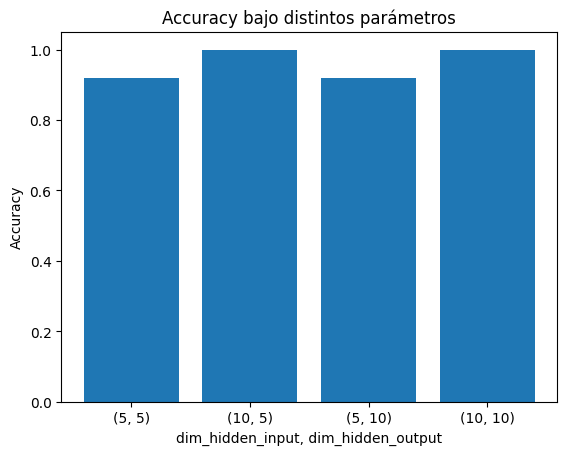

In [67]:
param = ["(5, 5)","(10, 5)", "(5, 10)", "(10, 10)"]
accuracy = [0.92, 1, 0.92, 1]

plt.bar(param, accuracy)

plt.xlabel('dim_hidden_input, dim_hidden_output')
plt.ylabel('Accuracy')
plt.title('Accuracy bajo distintos parámetros')

Del gráfico es posible observar que el accuracy aumenta al tener mayor cantidad de dimensiones en la capa de entrada, lo cual puede ocurrir debido a que una mayor dimensionalidad permite resolver problemas más complejos. Por otro lado, la variación en la capa de salida no produce mejora alguna.